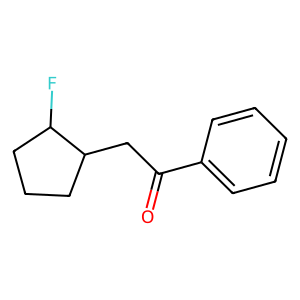

In [1]:
import sys
import rdkit
from rdkit import Chem, rdBase
from rdkit.Chem import BRICS
from rdkit.Chem import AllChem #used for 3d coordinates
from rdkit.Chem import Draw,rdDepictor
from rdkit.Chem.Draw import IPythonConsole, rdMolDraw2D
from rdkit.Chem.Scaffolds import rdScaffoldNetwork # scaffolding
from rdkit import RDPaths
from rdkit.Chem.Draw import rdMolDraw2D
import math
import matplotlib as mpl
from matplotlib import pyplot as plt
import os
import pyvis
import re
from pyvis.network import Network
import inspect
from IPython import display
from IPython.display import SVG
import pandas as pd #lots of work with data frames
from rdkit.Chem import PandasTools # Smiles and molecule  integration with Pandas
from rdkit.Chem import rdqueries # search for rdScaffoldAttachment points * to remove
import numpy as np #for arrays in fragment identification
sys.path.append("/Users/chemlab/Documents/Retrievium Work/Scaffolding/Coding Workspace/scripts")
import fragfinder as ff
import ifgconnect as ifgc
mol = ff.get_canonical_molecule('O=C(CC1CCCC1F)c2ccccc2')
Draw.MolToImage(mol)

# Summary

Notebook working in to develop connectivity features for fragmenting

In [2]:
molFrame = ff.generate_full_molFrame(mol)

[10:47:42] Running LargestFragmentChooser
[10:47:42] Fragment: O=C(CC1CCCC1F)c1ccccc1
[10:47:42] New largest fragment: O=C(CC1CCCC1F)c1ccccc1 (30)


In [3]:
ff.trim_molpart(molFrame,molFrame['molPart'].unique(),mol)

[8, 2, 7]
[[1, 1], [2, 2], [3, 3]]


{'smiles': ['[1*]C(=O)C[2*]', '[1*]c1ccccc1', '[2*]C1CCCC1[3*]', '[3*]F'],
 'count': 4}

In [4]:
molFrame

,atomNum,inRing,molPart
0,8,False,Linker 1
1,6,False,Linker 1
2,6,False,Linker 1
3,6,True,Ring 1
4,6,True,Ring 1
5,6,True,Ring 1
6,6,True,Ring 1
7,6,True,Ring 1
8,9,False,Peripheral 1
9,6,True,Ring 2


In [5]:
ff.trim_connections(molFrame,'Ring 1',[0,6],mol,1,{})

{'smiles': '*.*1CCCC1 |$1;1;;;;$|',
 'count': 2,
 'connectivityDict': {'Ring 1': {'Linker 1': 1}}}

In [6]:
fragFrame = ff.identify_connected_fragments('O=C(CC1CCCC1F)c2ccccc2')

[8, 2, 7]
[[1, 1], [2, 2], [3, 3]]


[10:47:42] Running LargestFragmentChooser
[10:47:42] Fragment: O=C(CC1CCCC1F)c1ccccc1
[10:47:42] New largest fragment: O=C(CC1CCCC1F)c1ccccc1 (30)


,Smiles,Molecule,xyz,numAttachments
0,[1*]C([4*])=O,,4\n\nAt -1.936633 -0.844379 -0.041986\n...,2
1,[2*]C1CCCC1[3*],,15\n\nAt -0.023951 2.728345 0.411644\...,2
2,[1*]c1ccccc1,,12\n\nAt 3.572525 -0.290541 -0.050385\...,1
3,[3*]F,,2\n\nAt 1.058020 0.000000 0.000000\n...,1
4,[2*]C[4*],,5\n\nAt 1.915014 1.009755 -0.025872\n...,2

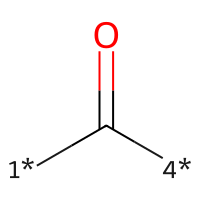
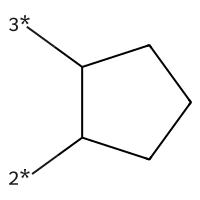
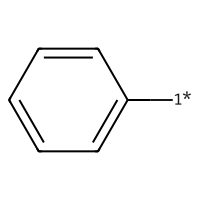
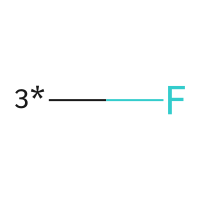
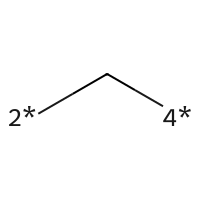

In [7]:
testMol = fragFrame['Molecule'][2]
fragFrame

In [8]:
fragFrame = ff.identify_connected_fragments('Cc1nc2ccc(cc2s1)NC(=O)c3cc(ccc3N4CCCC4)S(=O)(=O)N5CCOCC5')

[0, 6, 9, 12, 24, 15]
[[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6]]


[10:47:42] Running LargestFragmentChooser
[10:47:42] Fragment: Cc1nc2ccc(NC(=O)c3cc(S(=O)(=O)N4CCOCC4)ccc3N3CCCC3)cc2s1
[10:47:42] New largest fragment: Cc1nc2ccc(NC(=O)c3cc(S(=O)(=O)N4CCOCC4)ccc3N3CCCC3)cc2s1 (59)


In [9]:
fragFrame = ff.identify_connected_fragments('c1ccc(c(c1)c2ccc(o2)C(=O)N3C[C@H](C4(C3)CC[NH2+]CC4)C(=O)NCCOCCO)F')

[8, 11, 13, 17, 23]
[[1, 1], [2, 2], [3, 3], [4, 4], [5, 5]]


[10:47:42] Running LargestFragmentChooser
[10:47:42] Fragment: O=C(NCCOCCO)[C@@H]1CN(C(=O)c2ccc(-c3ccccc3F)o2)CC12CC[NH2+]CC2
[10:47:42] New largest fragment: O=C(NCCOCCO)[C@@H]1CN(C(=O)c2ccc(-c3ccccc3F)o2)CC12CC[NH2+]CC2 (64)


,Smiles,Molecule
0,[5*]N[5*],
1,[4*]CCO,
2,[14*]c1ccc([14*])o1,
3,[16*]c1ccccc1F,
4,[5*]N1C[C@@H]([15*])C2(CC[NH2+]CC2)C1,
5,[3*]O[3*],
6,[4*]CC[4*],
7,[1*]C([6*])=O,

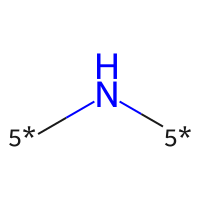
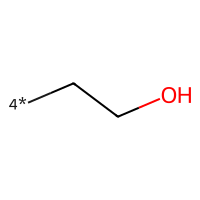
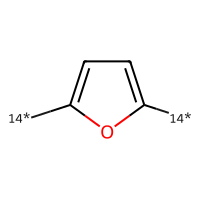
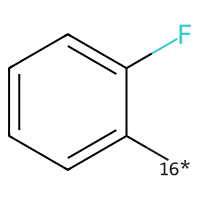
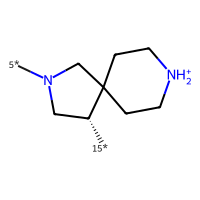
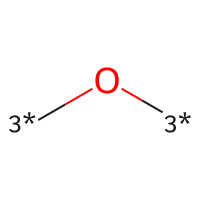
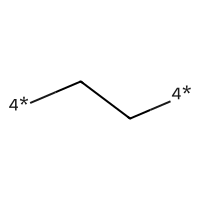
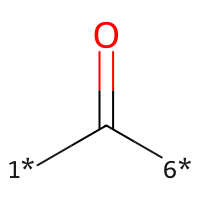

In [10]:
ff.generate_fragment_frame(list(BRICS.BRICSDecompose(Chem.MolFromSmiles('c1ccc(c(c1)c2ccc(o2)C(=O)N3C[C@H](C4(C3)CC[NH2+]CC4)C(=O)NCCOCCO)F'))))

['*O*', 'CC', '*F', 'C(=O)N', '*O', 'C=O', 'c1ccccc1', 'c1ccco1']
1


,Smiles,Molecule,count
0,*O*,,1
1,CC,,2
2,*F,,1
3,C(=O)N,,1
4,*O,,1
5,C=O,,1
6,c1ccccc1,,1
7,c1ccco1,,1
8,[C@@H]1CNCC12CC[NH2+]CC2,,1

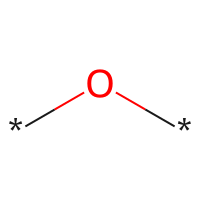
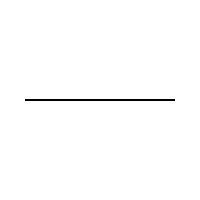
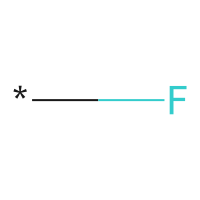
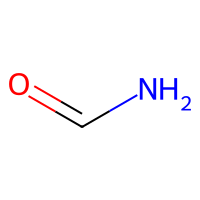
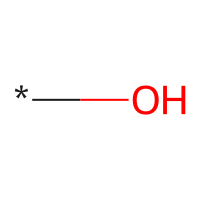
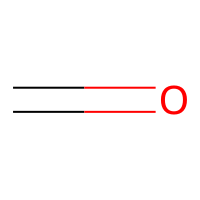
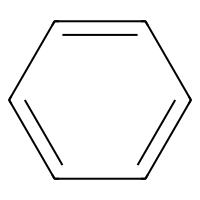
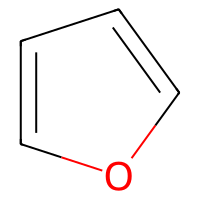
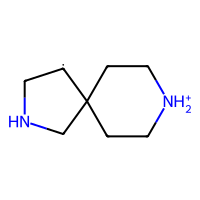

In [11]:
ff.count_uniques(fragFrame,dropAttachements=True)

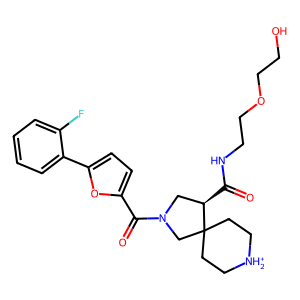

In [12]:
Draw.MolToImage(Chem.MolFromSmiles('c1ccc(c(c1)c2ccc(o2)C(=O)N3C[C@H](C4(C3)CC[NH2+]CC4)C(=O)NCCOCCO)F'))

In [13]:
'*'.isupper()

False